<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

In [36]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Confidence Intervals Using the Normal Distribution

In [37]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [38]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

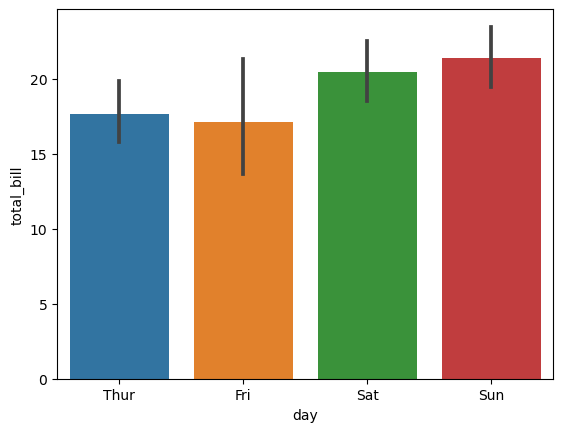

In [40]:
# ci default value is 95

sns.barplot(x="day", y="total_bill", data=tips, ci=95);

3. Subset a dataframe just including Sunday tips

In [41]:
tipsSun = tips[tips['day'] == "Sun"]

In [42]:
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. Calculate mean and std

In [43]:
tipsSun["total_bill"].mean()

21.410000000000004

In [44]:
tipsSun.shape

(76, 7)

In [45]:
tipsSun["total_bill"].std()

8.832121828869889

5. Calculate standart error of the mean

In [46]:
sem = tipsSun["total_bill"].std() / np.sqrt(tipsSun.shape[0])

In [47]:
sem

1.0131138555021968

In [48]:
tipsSun["total_bill"].sem()

1.0131138555021968

6. Calculate the margin of error (95%)

In [49]:
moe = 1.96 * sem

In [50]:
moe

1.9857031567843058

7. Calculate the upper confidence limit

In [51]:
upper_lim=tipsSun["total_bill"].mean() + moe
upper_lim

23.39570315678431

8. Calculate the lower confidence limit

In [52]:
low_lim=tipsSun["total_bill"].mean() - moe
low_lim

19.424296843215696

In [53]:
#help(stats.norm.interval)

9. Calculate 95% Confidence Interval around the mean by using scipy.stats. 

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [54]:
ci_z = stats.norm.interval(0.95, loc = tipsSun["total_bill"].mean(), scale = sem)
ci_z

(19.42433333097718, 23.395666669022827)

In [55]:
ci_t = stats.t.interval(0.95, len(tipsSun["total_bill"])-1, loc=tipsSun["total_bill"].mean(), scale=tipsSun["total_bill"].sem())
ci_t

(19.391773706521036, 23.42822629347897)

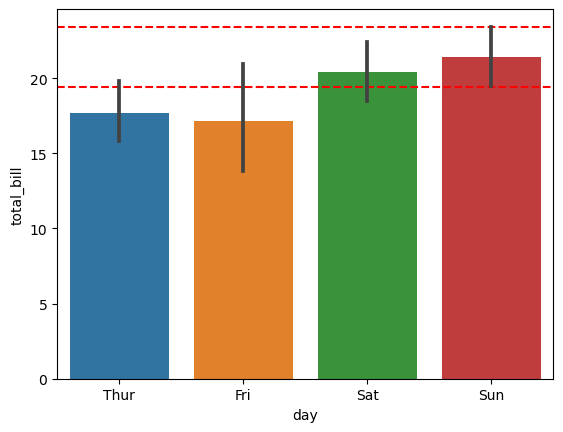

In [56]:
plt.axhline(y = ci_t[0], color = 'r', ls= '--')
plt.axhline(y = ci_t[1], color = 'r', ls= '--')
sns.barplot(x="day", y="total_bill", data=tips, ci=95);

In [22]:
tips.groupby("day").total_bill.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [71]:
tipsSample=tipsSun[0:20]

In [72]:
tipsSample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 41
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  20 non-null     float64 
 1   tip         20 non-null     float64 
 2   sex         20 non-null     category
 3   smoker      20 non-null     category
 4   day         20 non-null     category
 5   time        20 non-null     category
 6   size        20 non-null     int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 1.3 KB


In [73]:
tipsSample.describe()

,total_bill,tip,size
count,20.000000,20.000000,20.000000
mean,18.210500,2.887500,2.750000
std,6.610813,1.090248,0.850696
min,8.770000,1.010000,2.000000
25%,14.817500,1.897500,2.000000
50%,16.980000,3.070000,2.500000
75%,22.105000,3.527500,3.250000
max,35.260000,5.000000,4.000000


In [75]:
ci_sample = stats.norm.interval(0.95, loc = tipsSample["total_bill"].mean(), scale = sem)
ci_sample

(15.313236743908488, 21.107763256091513)

In [63]:
tipsSample["total_bill"].mean()

18.2105

In [64]:
tipsSample["total_bill"].std()

6.610812892924979

In [65]:
sem = tipsSample["total_bill"].std() / np.sqrt(tipsSample.shape[0])
sem

1.4782227015112293

In [68]:
ci_sample = stats.norm.interval(0.95, loc = tipsSample["total_bill"].mean(), scale = sem)
ci_sample

(15.313236743908488, 21.107763256091513)

In [76]:
ci_tsample = stats.t.interval(0.95, len(tipsSample["total_bill"])-1, loc=tipsSample["total_bill"].mean(), scale=tipsSample["total_bill"].sem())
ci_tsample

(15.11654432796463, 21.304455672035367)